第一題：把ionosphere.data資料抓進來(第二行程式)

第二題：完成課本第二章節內容(第一行到第二十四行)，照課本執行，應該不是82.3%而是82.6%

In [1]:
import numpy as np
import csv

In [2]:
import os
data_filename = os.path.join("ionosphere.data")

In [3]:
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [4]:
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [7]:
estimator.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.6%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [11]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21)) # Include 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [12]:
%matplotlib inline

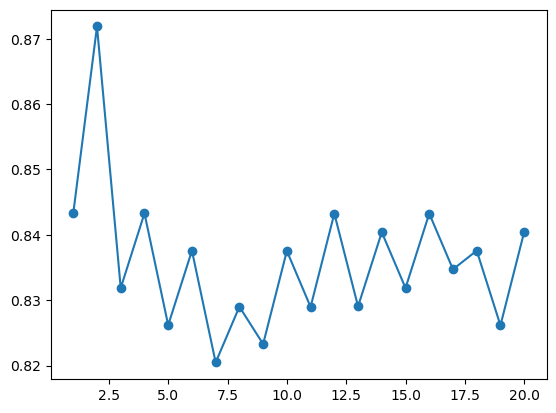

In [13]:
from matplotlib import pyplot as plt
plt.plot(parameter_values,  avg_scores, '-o')

In [14]:
X_broken = np.array(X)

In [15]:
X_broken[:,::2] /= 10

In [16]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y, scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y, scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))


The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
X_transformed = MinMaxScaler().fit_transform(X)

In [19]:
import sklearn
sklearn.preprocessing.Normalizer


sklearn.preprocessing._data.Normalizer

In [20]:
sklearn.preprocessing.Binarizer

sklearn.preprocessing._data.Binarizer

In [21]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The average accuracy for is 82.9%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),('predict', KNeighborsClassifier())])

In [24]:
scores = cross_val_score(scaling_pipeline, X_broken, y, 
scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".
format(np.mean(transformed_scores) * 100))

The pipeline scored an average accuracy for is 82.9%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

第三題：找到最少數目的壓縮原型（壓縮樣本），並盡量接近目標82.3%
印出最接近準確率，壓縮後的樣本數(每個樣本資料)，以及屬於原本第幾筆資料。
心得：在每次循環遍歷完剩餘訓練集樣本後，檢查是否有不正確的分類。如果沒有，則表示所有剩餘樣本都可以由當前原型樣本集正確分類，所以跳出循環並完成數據集縮減。透過這樣的方式，慢慢找出濃縮後的樣本，但發現經過壓縮後，樣本數到70筆上下，但精準度會比預期的82.3好上不少，可以到達89.8附近。

In [24]:
#最優解
import numpy as np
import csv
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score
from random import choice

# Load dataset
data_filename = os.path.join("ionosphere.data")
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'

# Split the dataset
train_indices = np.arange(len(X))
train_indices, test_indices = train_test_split(train_indices, random_state=14)
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]



#這是一個自定義的函數，用於實現CNN（Condensed Nearest Neighbor）數據集縮減方法。
#它接受三個參數：X_train（特徵訓練集），y_train（標籤訓練集），和train_indices（訓練集在原始數據中的索引）
def cnn_reduction(X_train, y_train, train_indices):
    random_idx = choice(range(len(X_train)))
    condensed_X = [X_train[random_idx]]
    condensed_y = [y_train[random_idx]]
    condensed_indices = [train_indices[random_idx]]
    X_train_remaining = np.delete(X_train, random_idx, axis=0)
    y_train_remaining = np.delete(y_train, random_idx, axis=0)
    remaining_indices = np.delete(train_indices, random_idx, axis=0)
    
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(condensed_X)
    
    while True:
        #在循環的開始，將incorrect_classification設置為False。這個變量用於檢查是否有不正確的分類
        incorrect_classification = False
        #遍歷剩餘訓練集樣本的索引、特徵（x）和標籤（y）
        for idx, (x, y) in enumerate(zip(X_train_remaining, y_train_remaining)):
            #對於當前樣本（x），計算與原型樣本的最近鄰居。distances表示距離，indices表示最近鄰居在原型樣本中的索引
            distances, indices = nn.kneighbors([x])
            #檢查最近鄰居的標籤是否與當前樣本的標籤相同。如果不同，則認為分類是不正確的
            if condensed_y[indices[0][0]] != y:
                #將當前樣本（x和y）添加到原型樣本（condensed_X和condensed_y）中。
                #將當前樣本在原始數據中的索引添加到condensed_indices中。
                #從X_train_remaining、y_train_remaining和remaining_indices中刪除當前樣本。
                #使用break跳出循環，然後重新計算最近鄰居。
                incorrect_classification = True
                condensed_X.append(x)
                condensed_y.append(y)
                condensed_indices.append(remaining_indices[idx])
                X_train_remaining = np.delete(X_train_remaining, idx, axis=0)
                y_train_remaining = np.delete(y_train_remaining, idx, axis=0)
                remaining_indices = np.delete(remaining_indices, idx, axis=0)
                break
        nn.fit(condensed_X)
        #在每次循環遍歷完剩餘訓練集樣本後，檢查是否有不正確的分類。
        #如果沒有，則表示所有剩餘樣本都可以由當前原型樣本集正確分類，所以跳出循環並完成數據集縮減。
        if not incorrect_classification:
            break
    #將得到的原型樣本（特徵、標籤和索引）轉換為NumPy數組並返回        
    return np.array(condensed_X), np.array(condensed_y), np.array(condensed_indices)

# Apply the CNN reduction
condensed_X_train, condensed_y_train, condensed_indices = cnn_reduction(X_train, y_train, train_indices)

# Train and evaluate the 1-NN classifier
#n_neighbors設置為1，表示使用1-NN分類器
estimator = KNeighborsClassifier(n_neighbors=1)
estimator.fit(condensed_X_train, condensed_y_train)
y_predicted = estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted) * 100
print("最優解")
print("The accuracy of the 1-NN classifier using condensed prototypes is {0:.1f}%".format(accuracy))
print(" ")
# Print the condensed samples with their original indices

print("Condensed samples ({} total):".format(len(condensed_X_train)))
print(" ")
print("印出每項樣本資料")
for i, (sample, index) in enumerate(zip(condensed_X_train, condensed_indices), start=1):
    print("Sample {}: {} (原本第{}資料)".format(i, sample, index))


最優解
The accuracy of the 1-NN classifier using condensed prototypes is 89.8%
 
Condensed samples (74 total):
 
印出每項樣本資料
Sample 1: [1.      0.      0.83609 0.13215 0.72171 0.06059 0.65829 0.08315 0.23888
 0.12961 0.43837 0.2033  0.49418 0.12686 0.44747 0.13507 0.29352 0.02922
 0.48158 0.15756 0.32835 0.14616 0.29495 0.14638 0.26436 0.1453  0.23641
 0.14314 0.26429 0.16137 0.18767 0.13632 0.16655 0.13198] (原本第286資料)
Sample 2: [ 0.  0.  1.  1.  1. -1.  0.  0.  0.  0.  1.  1.  1.  1. -1. -1.  1. -1.
 -1.  1.  0.  0.  1. -1.  1. -1.  1.  1. -1. -1.  0.  0.  0.  0.] (原本第51資料)
Sample 3: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] (原本第168資料)
Sample 4: [ 1.       0.       0.85209  0.39252  0.38887  0.76432  0.08858  0.98903
 -0.42625  0.88744 -0.76229  0.4998  -0.93092  0.10768 -0.859   -0.31044
 -0.6603  -0.55262 -0.1926  -0.86063  0.28444 -0.80496  0.64649 -0.3523
  0.77814 -0.23324  0.71698  0.21343  0.3783   0.5831   0.19667  0.663

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
#最接近82.3%解
import numpy as np
import csv
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

data_filename = os.path.join("ionosphere.data")
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

knn = KNeighborsClassifier(n_neighbors=1)

X_condensed = [X_train[0]]
y_condensed = [y_train[0]]
con_num = []
acc = []

while True:
    knn.fit(X_condensed, y_condensed)
    y_pred = knn.predict(X_train)
    incorrect_indices = [i for i in range(len(y_train)) if y_pred[i] != y_train[i]]
    if len(incorrect_indices) == 0:
        break
    else:
        X_condensed.append(X_train[incorrect_indices[0]])
        y_condensed.append(y_train[incorrect_indices[0]])
    knn.fit(X_condensed, y_condensed)
    y_pred_test = knn.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    con_num.append(len(X_condensed))
    acc.append(acc_test* 100)

acc_differ=[]
for i in range(len(con_num)):
    acc_differ.append(abs(acc[i]-82.3))

zipped_lists = zip(acc_differ, con_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
acc_differ, con_num = [list(tuple) for tuple in tuples]
print("最接近82.3%解")
print("Number of condensed prototypes: {0}， accuracy: {1:.1f}%".format(con_num[0], (acc[con_num[0]-2])))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

最接近82.3%解
Number of condensed prototypes: 20， accuracy: 81.8%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [ ]:
##上面跑出來的結果在紅字warning內，翻一下在中間會有數據